In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Descriptive Statistics

In [3]:
df = pd.read_excel (r'youtube_statistics.xlsx')

In [3]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [5]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [4]:
cats = ['title', 'category_id', 'channel_title', 'tags', 'comments_disabled', 
        'ratings_disabled', 'video_error_or_removed', 'description']
nums = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
timestamp = ['trending_date', 'publish_time', 'publish_date']

In [7]:
df_cats = df [cats]
df_cats ['category_id'] = df_cats ['category_id'].astype(str)

In [8]:
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [9]:
df_cats.describe()

,title,category_id,channel_title,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36791,36746
unique,16431,17,1390,12463,2,2,2,13979
top,Mission: Impossible - Fallout (2018) - Officia...,24,VikatanTV,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,19,16462,284,1120,35611,36034,36780,166


In [5]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_timedelta(df['publish_time'])

In [11]:
df[timestamp].describe()

,trending_date,publish_time,publish_date
count,36791,36791,36791
mean,2018-02-26 13:30:23.630779392,0 days 11:05:38.040009785,2018-02-24 11:20:36.334973440
min,2017-11-14 00:00:00,0 days 00:00:00,2017-05-27 00:00:00
25%,2018-01-02 00:00:00,0 days 06:48:28,2017-12-31 00:00:00
50%,2018-02-25 00:00:00,0 days 11:29:32,2018-02-23 00:00:00
75%,2018-04-24 00:00:00,0 days 14:50:07,2018-04-23 00:00:00
max,2018-06-14 00:00:00,0 days 23:59:58,2018-06-13 00:00:00
std,NaN,0 days 05:13:00.888389956,NaN


In [34]:
combined_time_counts = df[['trending_date', 'publish_time']].value_counts()
print(combined_time_counts)

trending_date  publish_time   
2018-05-05     0 days 11:30:00    5
2018-03-03     0 days 04:30:01    5
2018-05-26     0 days 04:30:00    5
2018-05-14     0 days 12:00:05    4
               0 days 15:25:09    4
                                 ..
2018-01-13     0 days 06:30:01    1
               0 days 06:30:00    1
               0 days 06:29:27    1
               0 days 06:25:11    1
2018-06-14     0 days 23:30:01    1
Name: count, Length: 31502, dtype: int64


# Univariate Analysis

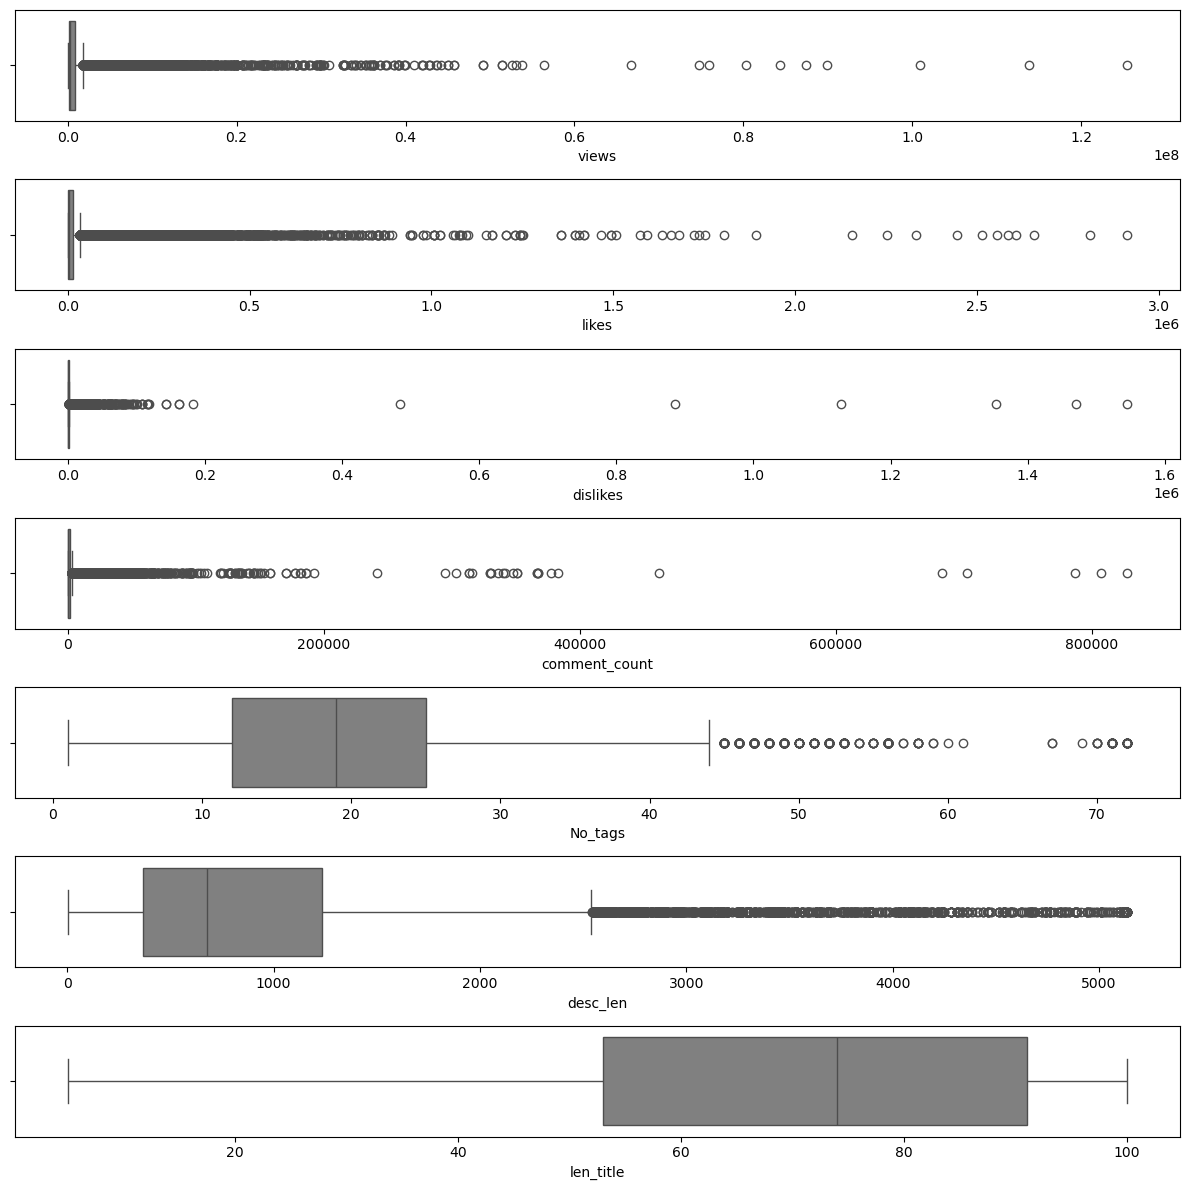

In [13]:
fig, axes = plt.subplots(nrows=len(nums), figsize=(12, 12))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 1, i+1)
    sns.boxplot(x=df[nums[i]], orient='h', color='gray')
    plt.tight_layout()

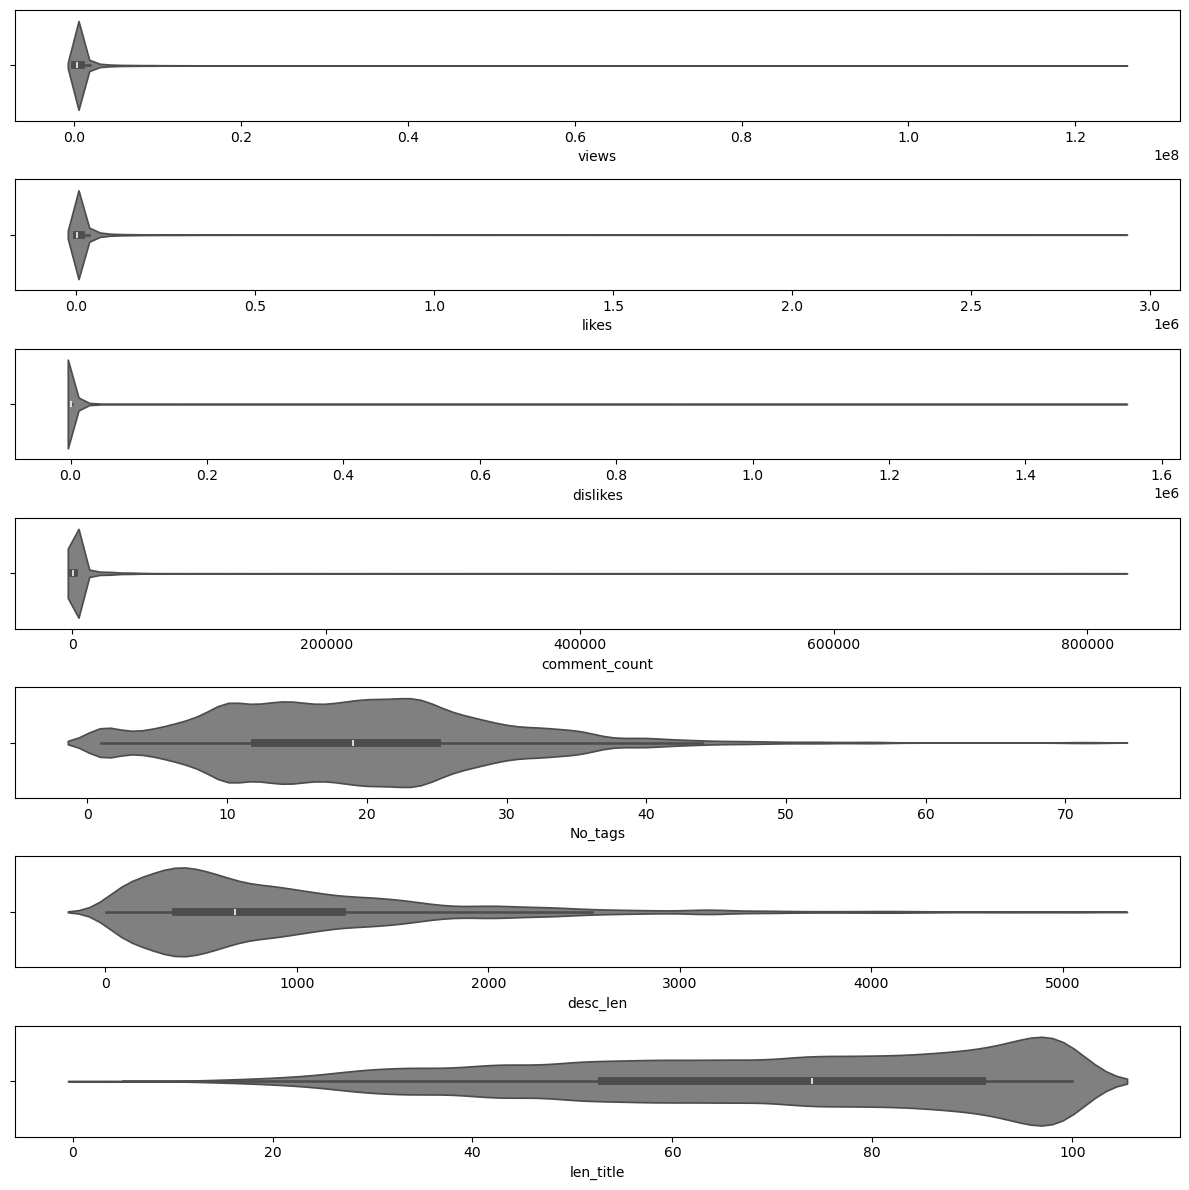

In [14]:
fig, axes = plt.subplots(nrows=len(nums), figsize=(12, 12))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 1, i+1)
    sns.violinplot(x=df[nums[i]], orient='h', color='gray')
    plt.tight_layout()

In [15]:
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


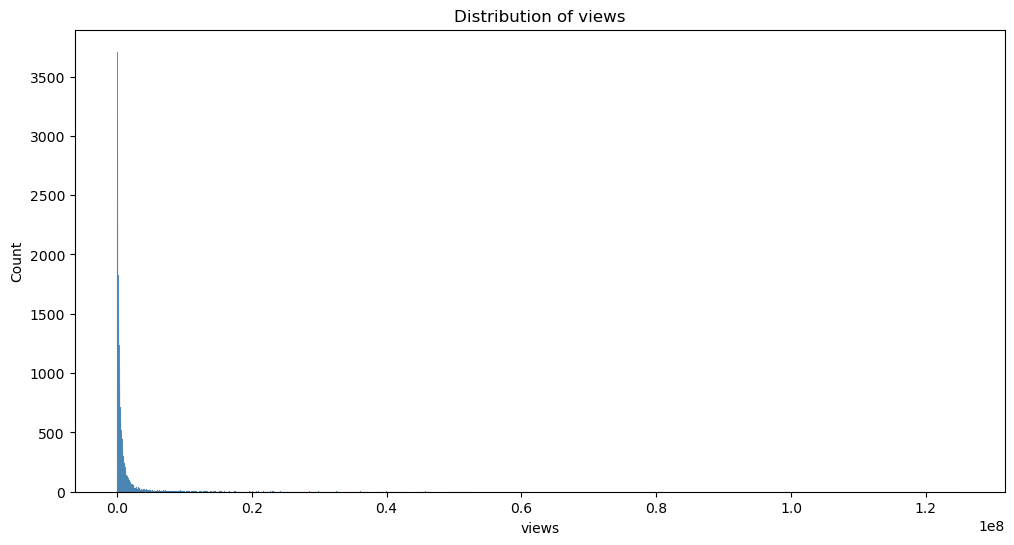

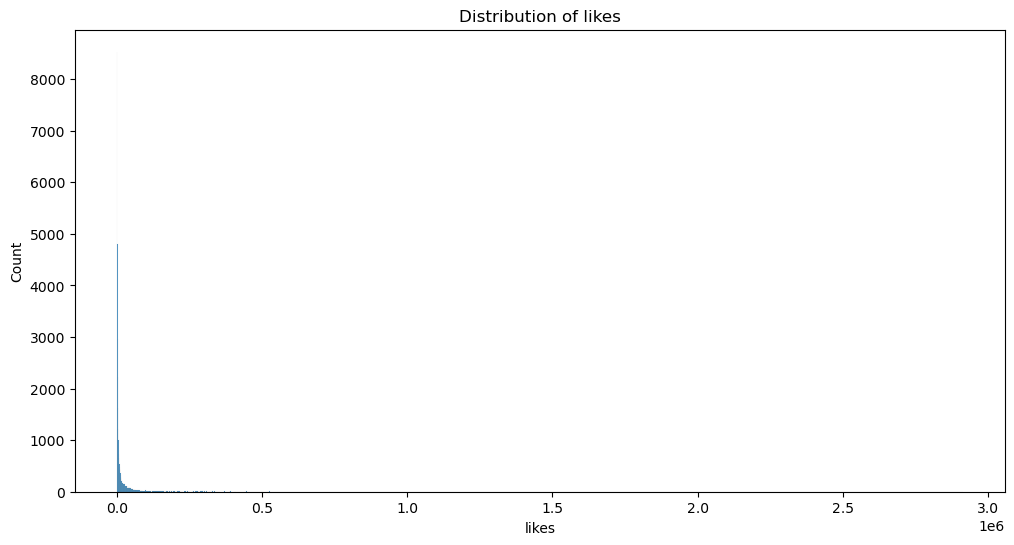

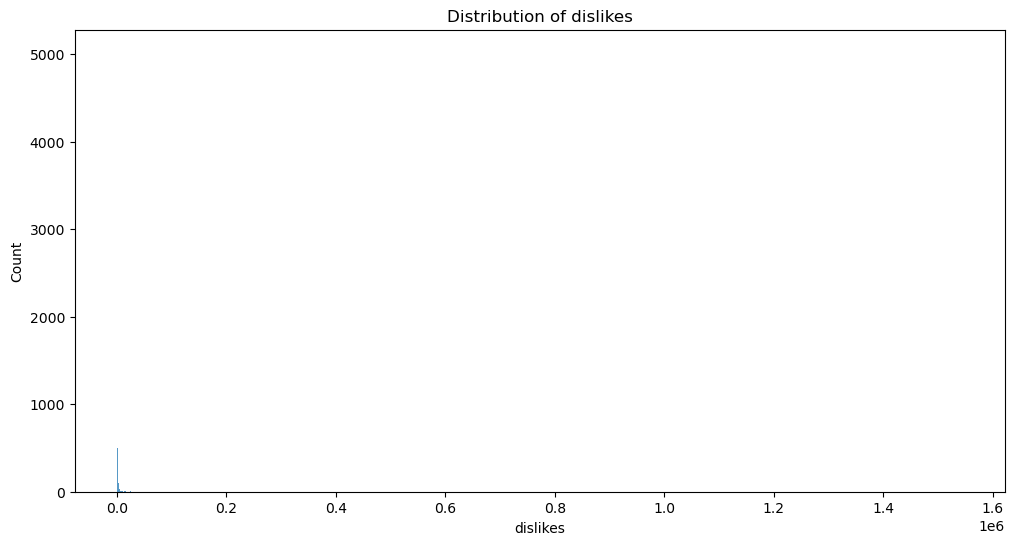

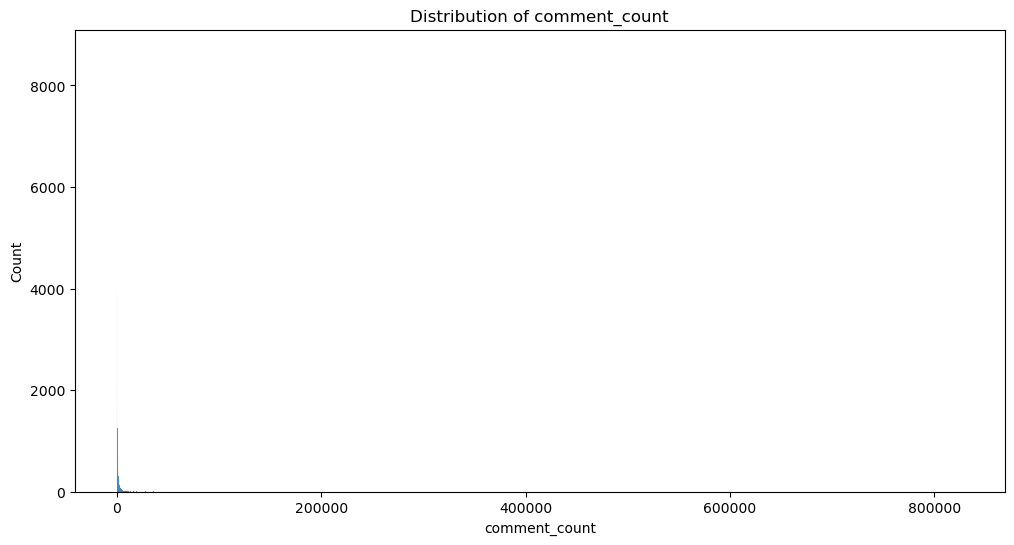

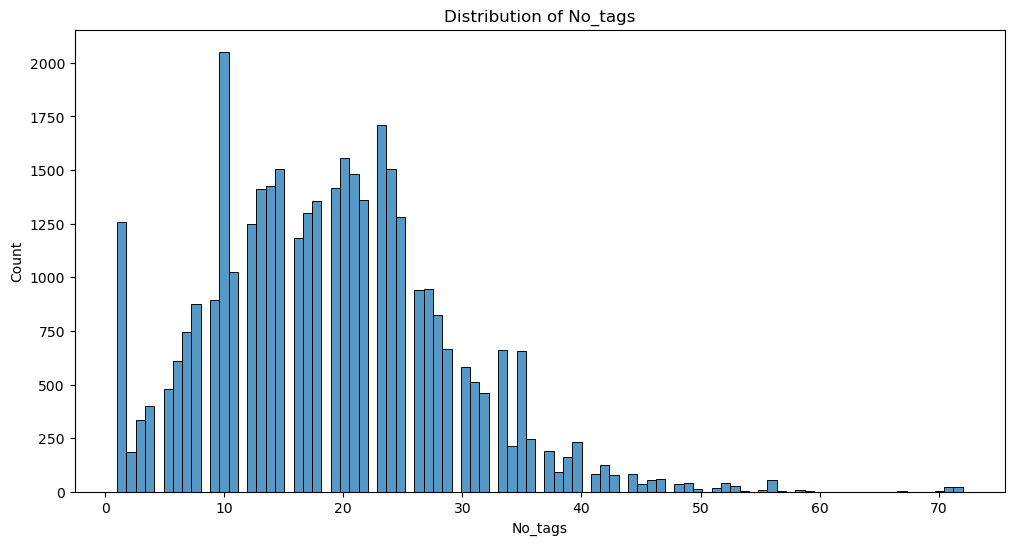

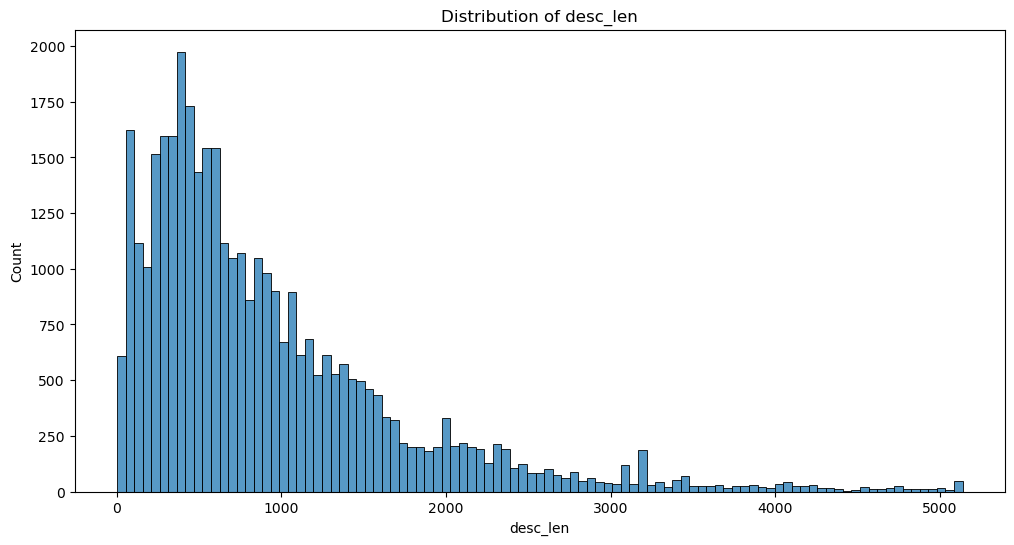

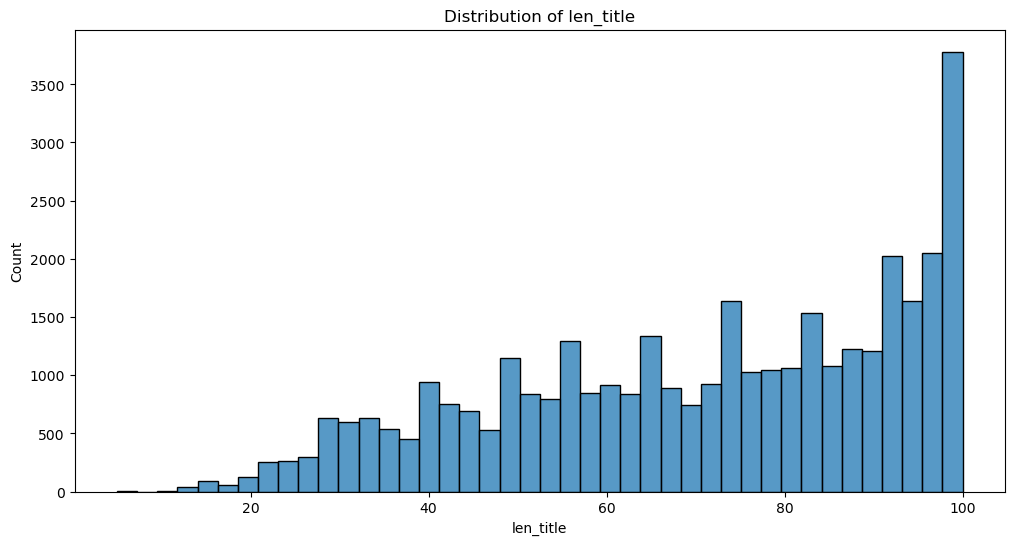

In [16]:
# Enlarge the image for all numerical columns
for col in nums:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [17]:
cats = ['category_id', 'channel_title', 'comments_disabled', 
        'ratings_disabled', 'video_error_or_removed']
df_cats = df [cats]
df_cats ['category_id'] = df_cats ['category_id'].astype(str)

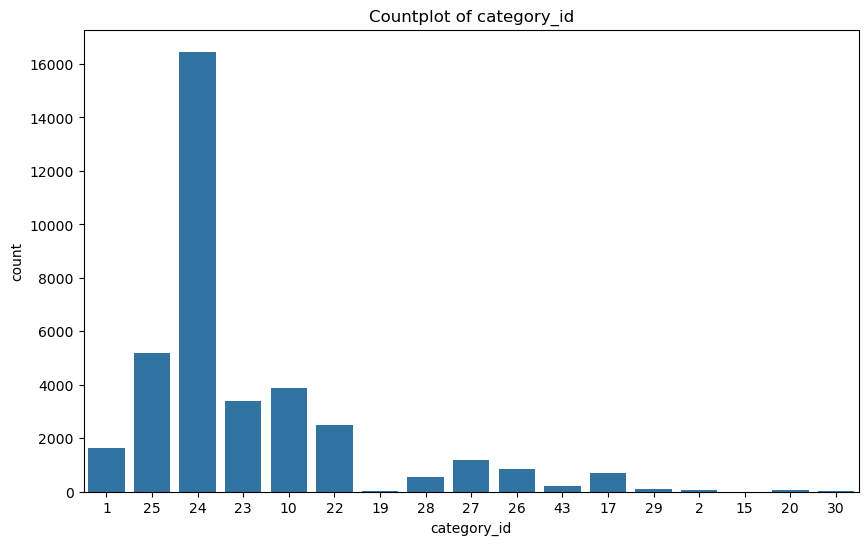

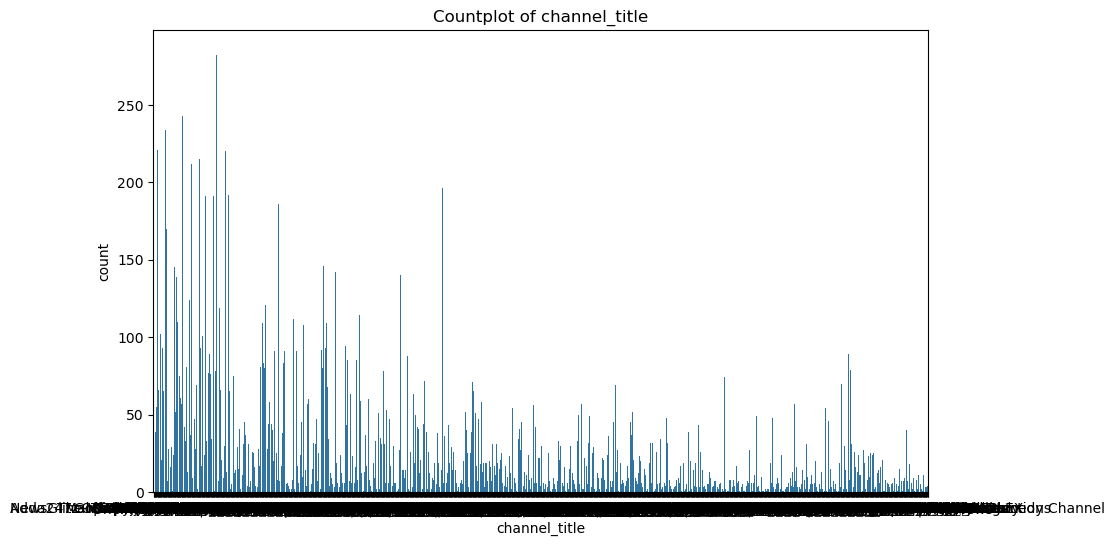

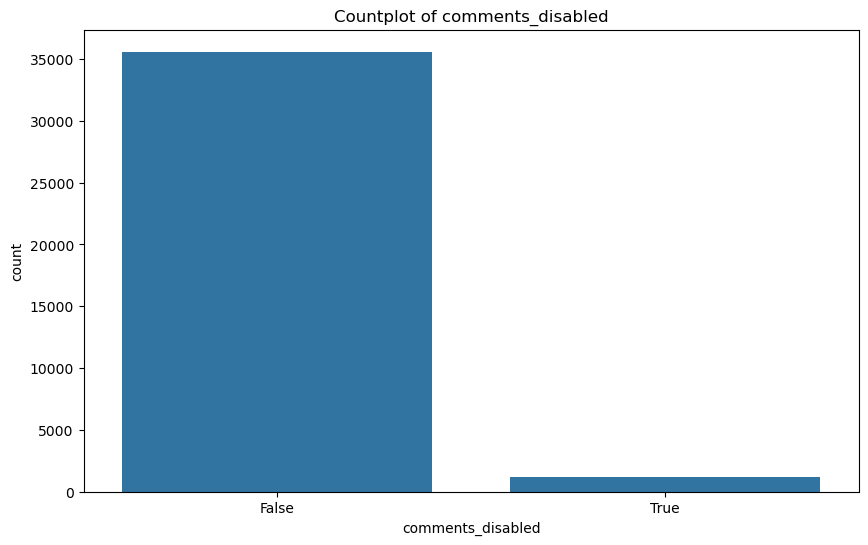

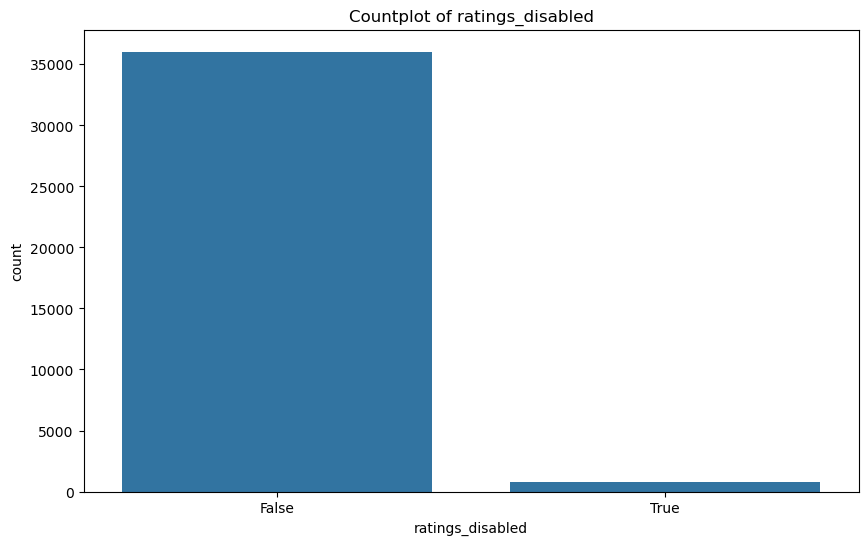

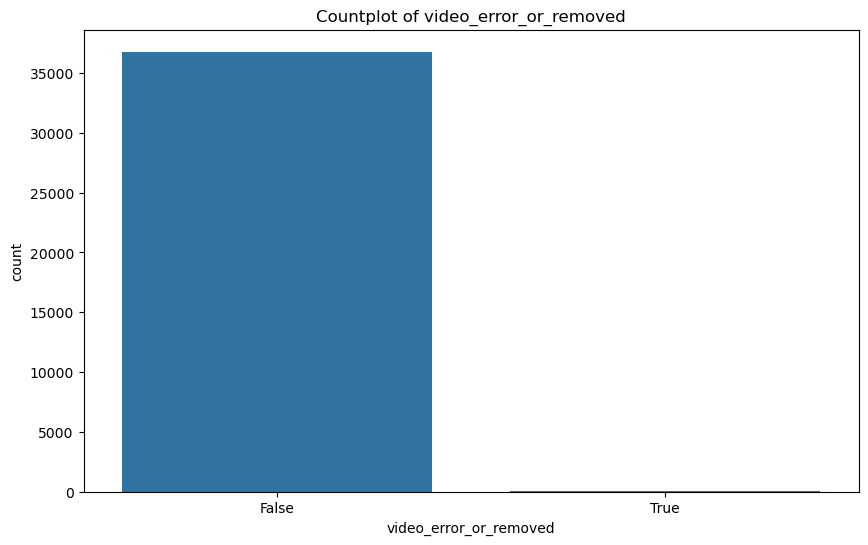

In [18]:
for col in cats:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cats, x=col)
    plt.title(f'Countplot of {col}')
    plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   trending_date           36791 non-null  datetime64[ns] 
 1   title                   36791 non-null  object         
 2   channel_title           36791 non-null  object         
 3   category_id             36791 non-null  int64          
 4   publish_time            36791 non-null  timedelta64[ns]
 5   tags                    36791 non-null  object         
 6   views                   36791 non-null  int64          
 7   likes                   36791 non-null  int64          
 8   dislikes                36791 non-null  int64          
 9   comment_count           36791 non-null  int64          
 10  comments_disabled       36791 non-null  bool           
 11  ratings_disabled        36791 non-null  bool           
 12  video_error_or_removed  36791 no

In [20]:
print(timestamp)

['trending_date', 'publish_time', 'publish_date']


<Figure size 1200x600 with 0 Axes>

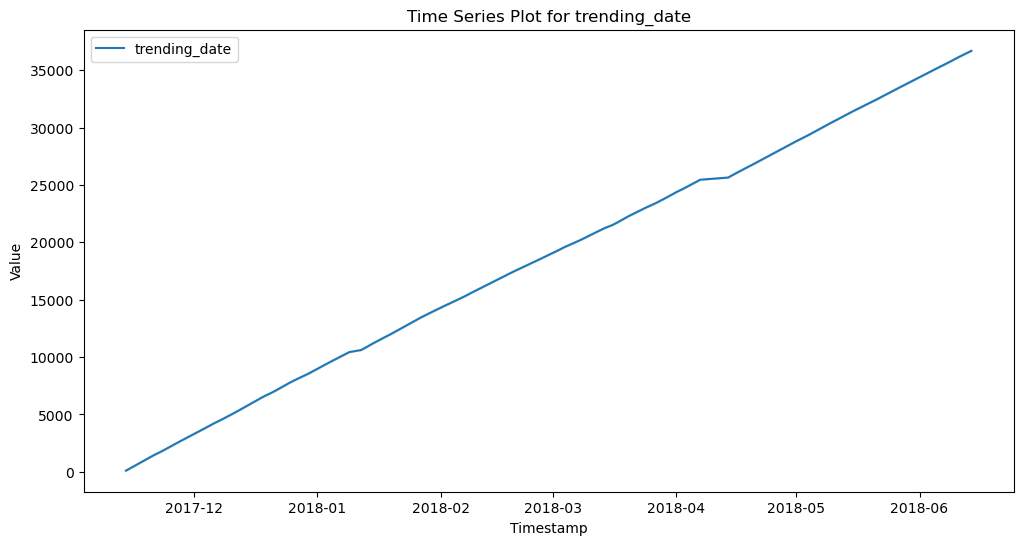

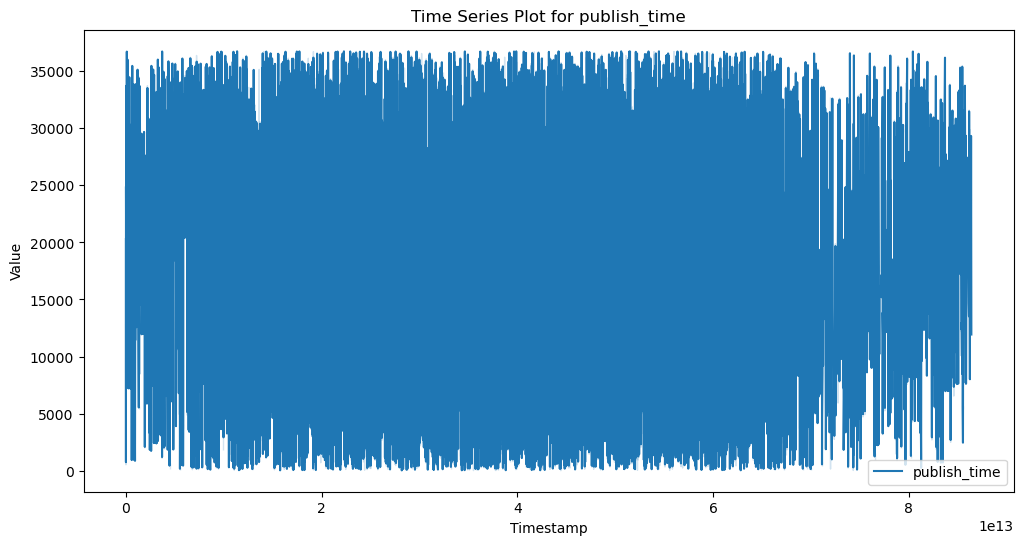

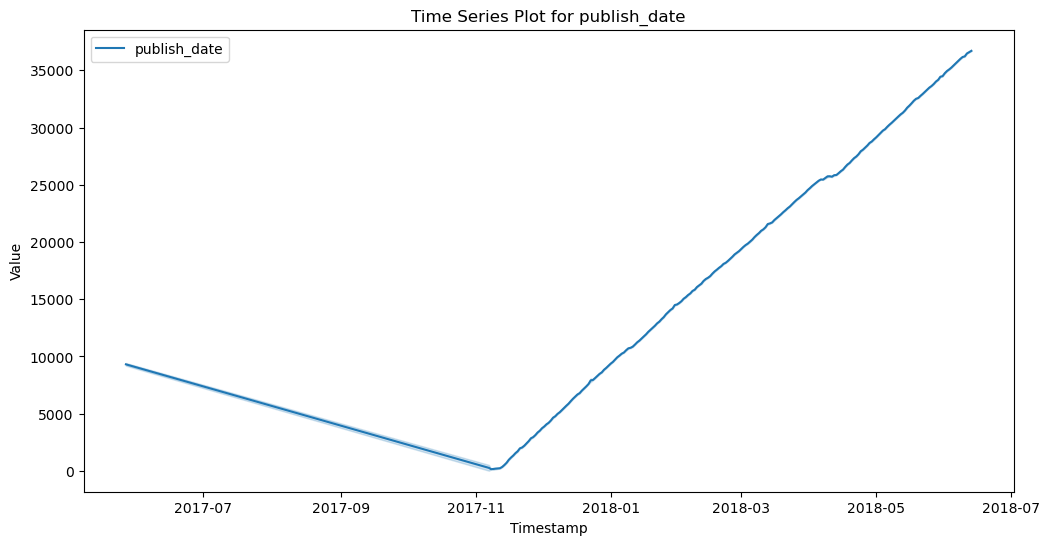

In [21]:
plt.figure(figsize=(12, 6))

for col in timestamp:
    plt.figure(figsize=(12, 6))
    sns.lineplot(y=df.index, x=df[col], label=col)
    plt.title(f'Time Series Plot for {col}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()  # Menampilkan legenda untuk setiap kolom timestamp
    plt.show()

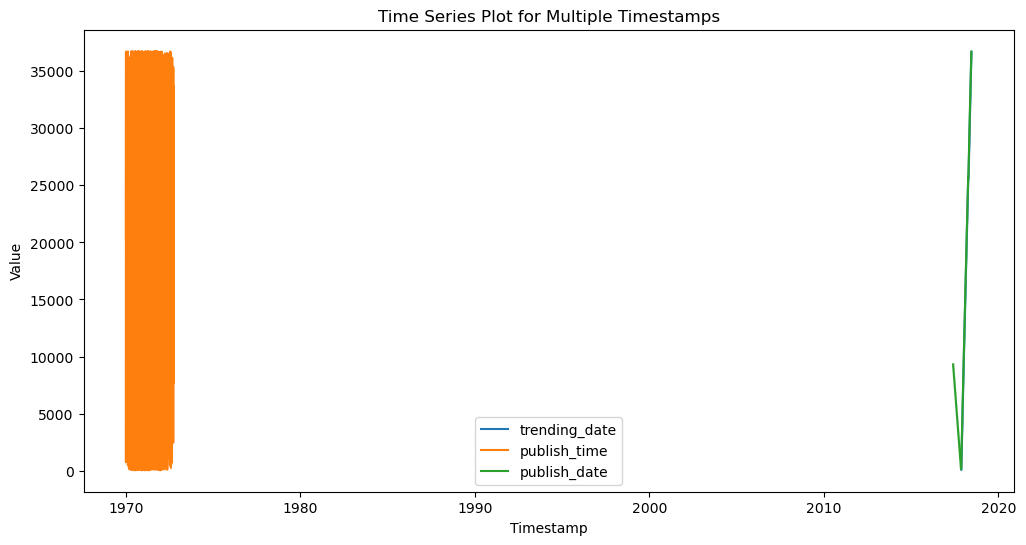

In [6]:
plt.figure(figsize=(12, 6))

for col in timestamp:
    sns.lineplot(y=df.index, x=df[col], label=col)

plt.title('Time Series Plot for Multiple Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()  # Menampilkan legenda untuk setiap kolom timestamp
plt.show()

Berikut adalah ringkasan statistik untuk setiap kolom dalam dataset:

1. **Views:**
   - Jumlah views rata-rata per video adalah sekitar 1,071,490, dengan variasi yang cukup besar (standar deviasi sekitar 3,207,149). Video dengan jumlah views paling sedikit memiliki 4,024 views, sementara video paling populer mencapai 125,432,200 views.

2. **Likes:**
   - Rata-rata likes per video adalah sekitar 27,450, dengan variasi yang signifikan (standar deviasi sekitar 97,831). Video yang tidak mendapatkan likes memiliki nilai minimum 0, sementara video dengan likes tertinggi mencapai 2,912,710.

3. **Dislikes:**
   - Jumlah dislikes rata-rata per video adalah sekitar 1,685, dengan variasi yang cukup besar (standar deviasi sekitar 16,197). Video yang tidak mendapatkan dislikes memiliki nilai minimum 0, sementara video dengan dislikes tertinggi mencapai 1,545,017.

4. **Comment Count:**
   - Rata-rata comment count per video adalah sekitar 2,714, dengan variasi yang signifikan (standar deviasi sekitar 14,978). Video tanpa komentar memiliki nilai minimum 0, sementara video dengan comment count tertinggi mencapai 827,755.

5. **No_tags:**
   - Rata-rata jumlah tags per video adalah sekitar 18.94, dengan variasi sekitar 9.84. Video dengan jumlah tags paling sedikit memiliki 1 tag, sementara video dengan jumlah tags tertinggi memiliki 72 tags.

6. **Desc_len:**
   - Panjang deskripsi rata-rata per video adalah sekitar 923.08 karakter, dengan variasi yang cukup besar (standar deviasi sekitar 815.04). Deskripsi terpendek memiliki 3 karakter, sementara deskripsi terpanjang mencapai 5,136 karakter.

7. **Len_title:**
   - Panjang judul rata-rata per video adalah sekitar 70.61 karakter, dengan variasi sekitar 22.41. Judul video terpendek memiliki 5 karakter, sementara judul video terpanjang memiliki 100 karakter.